### Importing the required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for label encoding
from sklearn import preprocessing

# for normalization
from sklearn.preprocessing import StandardScaler

# for chi2 test
from sklearn.feature_selection import chi2

### Loading the dataset

In [2]:
df = pd.read_csv("2015.csv")

### Understanding the dataset

In [3]:
# Viewing top5 entries
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

- The dataset has 158 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- The dataset has two qualitative columns: Country and Origin
- These variables may be required to be converted into quantitative for further analysis

In [6]:
# Identifying missing values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

- No columns have missing values

In [7]:
# Understanding Happiness Score column
df['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

In [8]:
# Creating bins to categorize countries into 'Low Happiness', 'Medium Happiness', and 'High Happiness' groups.
HappinessScore_bins=[0, 5, 7, np.inf]
labels=['Low Happiness','Medium Happiness','High Happiness']

df['Happiness Score'] = pd.cut(df['Happiness Score'], bins=HappinessScore_bins, labels=labels)

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,High Happiness,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,High Happiness,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,High Happiness,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,High Happiness,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,High Happiness,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


- The Happiness Scores have been converted to categorical variable

### Normalization

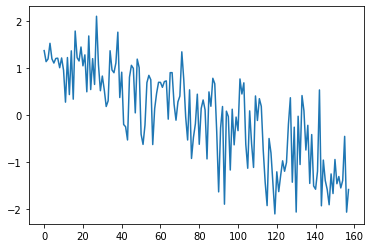

In [22]:
# Visualizing Economy (GDP per Capita) column before normalization
plt.plot(df['Economy (GDP per Capita)'])

In [36]:
# Normalizing
df['Economy (GDP per Capita)']=StandardScaler().fit_transform(np.array(df['Economy (GDP per Capita)']).reshape(-1, 1))

In [37]:
df['Economy (GDP per Capita)'].describe()

count    1.580000e+02
mean    -4.314411e-16
std      1.003180e+00
min     -2.105641e+00
25%     -7.473806e-01
50%      1.595344e-01
75%      7.771947e-01
max      2.101026e+00
Name: Economy (GDP per Capita), dtype: float64

(array([ 7., 17., 14., 14., 19., 24., 26., 26.,  7.,  4.]),
 array([-2.10564101, -1.68497429, -1.26430757, -0.84364085, -0.42297413,
        -0.00230741,  0.41835931,  0.83902603,  1.25969275,  1.68035947,
         2.1010262 ]),
 <BarContainer object of 10 artists>)

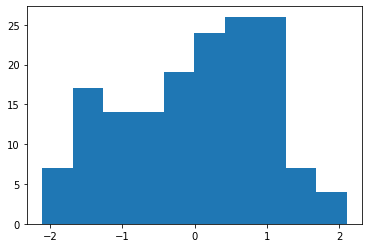

In [38]:
plt.hist(df['Economy (GDP per Capita)'])

### Encoding

In [12]:
# Enabling Label encoder
Label_encoder = preprocessing.LabelEncoder()

In [13]:
# Encoding qualitative variables to quantitave for further analysis
df['Region']=Label_encoder.fit_transform(df['Region'])
df['Country']=Label_encoder.fit_transform(df['Country'])

In [14]:
df.head()
# The values for columns have been converted from categorical to numerical values.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,High Happiness,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,High Happiness,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,High Happiness,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,High Happiness,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,High Happiness,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Chi-square test

In [20]:
X=df.drop(columns=['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)'])
# we have dropped 'Economy (GDP per Capita)' because it has been normalised and takes negative values
Y=df['Happiness Rank']
chi_scores=chi2(X,Y)
chi_scores

(array([4.18301911e+03, 2.73856613e+02, 9.63383602e-01, 1.17411594e+01,
        1.52064857e+01, 8.25943039e+00, 1.57722432e+01, 1.06129718e+01,
        2.29079625e+01]),
 array([0.00000000e+00, 1.70258781e-08, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]))

<AxesSubplot:>

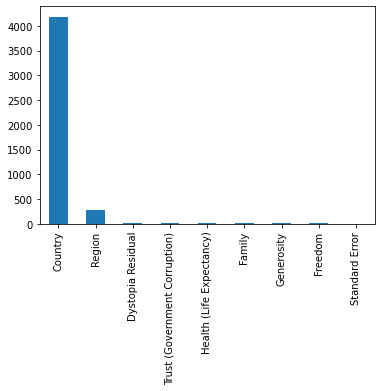

In [21]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<AxesSubplot:>

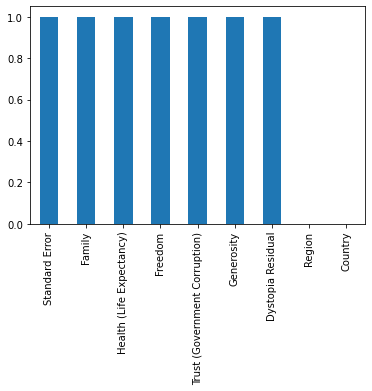

In [25]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

### Inference: 
- On perfroming the chi-square test, it can be understood from the plots for chi-scores and p-values that the target varible(Happiness Rank) is highly influenced by variables: 'Region' and 'Country'

- It can be observed that the data points were scaled between the interval: -1 and 1

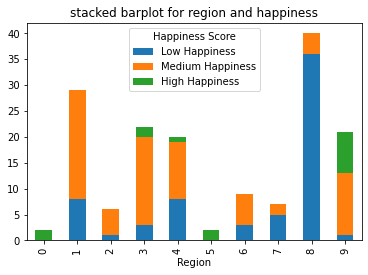

In [53]:
# Creating stacked barplot for region and happiness
cross_table01 = pd.crosstab(df['Region'], df['Happiness Score'])
# print(cross_table01)
plot = cross_table01.plot(kind="bar", stacked=True)
plt.title('stacked barplot for region and happiness')
plt.show()

In [56]:
# creating covariance matrix and heatmap to understand relationship among variables
cov_matrix = pd.DataFrame.cov(df)
cov_matrix

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,2093.500000,0.697452,-206.286624,0.026579,1.735417,1.986673,0.427653,0.590785,0.484157,0.684472,-0.500917
Region,0.697452,8.959969,29.277836,-0.001160,-0.781155,-0.137403,-0.264407,0.041754,0.059299,0.103735,-0.094904
Happiness Rank,-206.286624,29.277836,2093.461743,0.124358,-36.043631,-9.142720,-8.316021,-3.839647,-2.044785,-0.928243,-13.220847
Standard Error,0.026579,-0.001160,0.124358,0.000294,-0.003744,-0.000564,-0.001315,-0.000335,-0.000367,-0.000192,0.000797
Economy (GDP per Capita),1.735417,-0.781155,-36.043631,-0.003744,1.006369,0.176318,0.202375,0.055979,0.037074,-0.001330,0.022245
Family,1.986673,-0.137403,-9.142720,-0.000564,0.176318,0.074185,0.035741,0.018122,0.006722,0.003020,0.022332
Health (Life Expectancy),0.427653,-0.264407,-8.316021,-0.001315,0.202375,0.035741,0.061047,0.013422,0.007365,0.003391,0.002596
Freedom,0.590785,0.041754,-3.839647,-0.000335,0.055979,0.018122,0.013422,0.022708,0.008927,0.007138,0.005237
Trust (Government Corruption),0.484157,0.059299,-2.044785,-0.000367,0.037074,0.006722,0.007365,0.008927,0.014408,0.004199,-0.002200
Generosity,0.684472,0.103735,-0.928243,-0.000192,-0.001330,0.003020,0.003391,0.007138,0.004199,0.016049,-0.007104


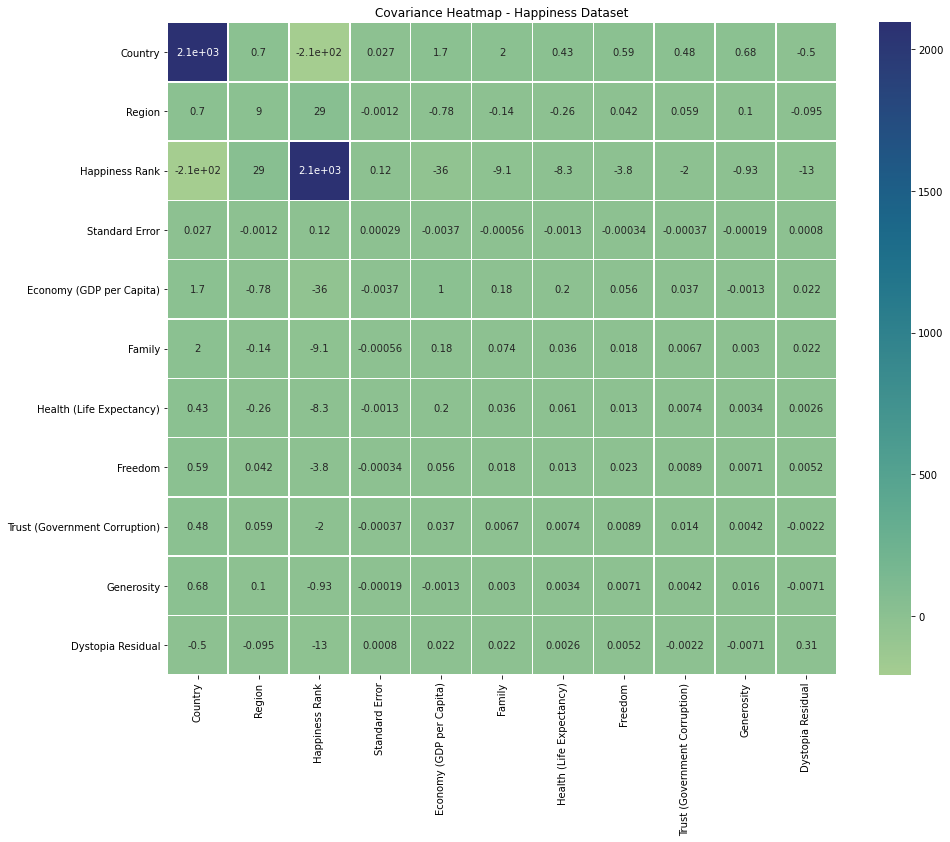

In [57]:
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Covariance Heatmap - Happiness Dataset')
plt.show()

### Visualizations

In [60]:
def countplot(column):
    plt.figure(figsize=(14,5))
    ax = sns.countplot(x=column, data=df, hue="Happiness Score",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Happiness Score{column}",fontweight="black",size=20,pad=20)
    plt.show()

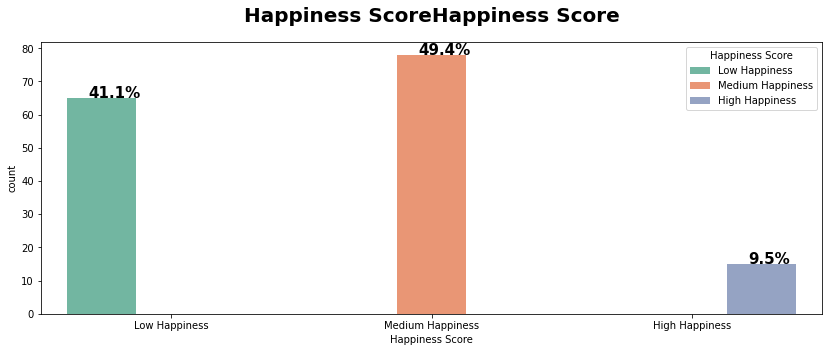

In [61]:
for col in df[['Happiness Score']]:
    countplot(col)